<a href="https://colab.research.google.com/github/Syrine-Dr/testing/blob/main/beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/Syrine-Dr/testing.git

Cloning into 'testing'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [10]:
!cd testing

In [14]:
!ls -a

.  ..  .config	.git  sample_data  testing


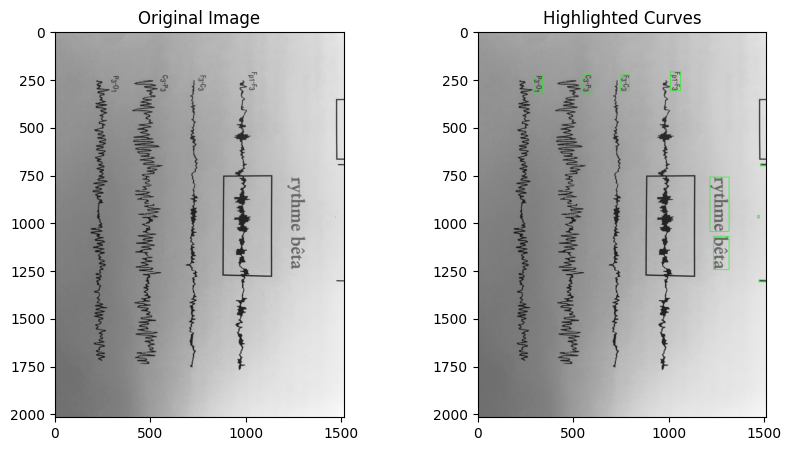

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def highlight_curves(image_path, proximity_threshold=30):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply edge detection using the Canny edge detector
    edges = cv2.Canny(img, 50, 150)

    # Apply morphological operations to remove small regions and noise
    kernel = np.ones((5, 5), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=2)
    edges = cv2.erode(edges, kernel, iterations=1)

    # Find contours in the edge-detected image with hierarchy information
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on their area and aspect ratio
    filtered_contours = []
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h)

        # Filter contours based on area and aspect ratio
        if area > 100 and 0.2 < aspect_ratio < 5:
            # Check if the contour has no parent (is not contained within another contour)
            if hierarchy[0][i][3] == -1:
                filtered_contours.append(cnt)

    # Calculate distances between rectangles
    distances = []
    for i in range(len(filtered_contours)):
        x1, y1, w1, h1 = cv2.boundingRect(filtered_contours[i])
        for j in range(i+1, len(filtered_contours)):
            x2, y2, w2, h2 = cv2.boundingRect(filtered_contours[j])
            distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            distances.append(distance)

    # Draw rectangles around the detected curves
    result_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for i, cnt in enumerate(filtered_contours):
        x, y, w, h = cv2.boundingRect(cnt)

        # Choose the rectangle color based on proximity
        rectangle_color = (0, 255, 0)  # Green by default
        for j in range(i+1, len(filtered_contours)):
            if distances.pop(0) < proximity_threshold:
                rectangle_color = (0, 0, 255)  # Red if close
                break

        cv2.rectangle(result_img, (x, y), (x + w, y + h), rectangle_color, 2)

    # Display the original and processed images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(result_img)
    plt.title('Highlighted Curves')

    plt.show()

image_path = r"/content/testing/beta.jpg"
highlight_curves(image_path)


In [17]:
!git push  https://github.com/Syrine-Dr/testing.git


error: src refspec refs/heads/master does not match any
error: failed to push some refs to 'https://github.com/Syrine-Dr/testing.git'
